<a href="https://colab.research.google.com/github/ImalkaPrasadini/Bigdata_Spark/blob/main/Task_15_Correlation_between_accidents_and_time_of_the_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import os,sys
# from google.colab import drive
# drive.mount('/content/MyDrive')
# nb_path = '/content/notebooks'
# os.symlink('/content/MyDrive/My Notebooks/Colab Notebooks', nb_path)
# sys.path.insert(0,nb_path)

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
pip install findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions as f

In [ ]:
# Load data to Task 15.
df_task15 = spark.read.csv('/content/sample_data/tf2.csv',header=True)
df_task15.show()

+------------+------------+------+--------------------+--------------------+--------------------+-----------+------------+--------+-----+---------------+---------------+-----+------------------+------+------------------+-------+---------+-----+--------------------+----+--------+----------+----------+--------------+-----------+--------------------+-----------------------+--------+------+------------------+------------+--------+-----------------+--------------------+
|Date Of Stop|Time Of Stop|Agency|           SubAgency|         Description|            Location|   Latitude|   Longitude|Accident|Belts|Personal Injury|Property Damage|Fatal|Commercial License|HAZMAT|Commercial Vehicle|Alcohol|Work Zone|State|         VehicleType|Year|    Make|     Model|     Color|Violation Type|     Charge|             Article|Contributed To Accident|    Race|Gender|       Driver City|Driver State|DL State|      Arrest Type|         Geolocation|
+------------+------------+------+--------------------+-----

In [ ]:
df_task15.printSchema()

root
 |-- Date Of Stop: string (nullable = true)
 |-- Time Of Stop: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- SubAgency: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Accident: string (nullable = true)
 |-- Belts: string (nullable = true)
 |-- Personal Injury: string (nullable = true)
 |-- Property Damage: string (nullable = true)
 |-- Fatal: string (nullable = true)
 |-- Commercial License: string (nullable = true)
 |-- HAZMAT: string (nullable = true)
 |-- Commercial Vehicle: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Work Zone: string (nullable = true)
 |-- State: string (nullable = true)
 |-- VehicleType: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Violati

In [ ]:
df_task15.describe().show()

+-------+------------+------------+------+--------------------+--------------------+--------------------+-------------------+-------------------+--------+-----+---------------+---------------+-----+------------------+------+------------------+-------+---------+-----+-------------------+------------------+------+-----+------+--------------+---------+--------------------+-----------------------+-----+------+------------+------------+--------+-----------------+--------------------+
|summary|Date Of Stop|Time Of Stop|Agency|           SubAgency|         Description|            Location|           Latitude|          Longitude|Accident|Belts|Personal Injury|Property Damage|Fatal|Commercial License|HAZMAT|Commercial Vehicle|Alcohol|Work Zone|State|        VehicleType|              Year|  Make|Model| Color|Violation Type|   Charge|             Article|Contributed To Accident| Race|Gender| Driver City|Driver State|DL State|      Arrest Type|         Geolocation|
+-------+------------+----------

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.stat import Correlation
from datetime import datetime
import time
import random as rand

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

#Get time and whethere there have accident or not 
df_task15 = df_task15.select('Time Of Stop','Contributed To Accident')

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

#Sort above based on time
#sorted=group_data.orderBy('Time Of Stop')
#sorted.show()

# Here contain 24hr clock. To get more simple consider only the hour that accident is happened. 
#Take the hour for each timestamp
sorted = (sorted.select("Time Of Stop").withColumn("hour", hour("Time Of Stop")))
#sorted.show()

#Join above datafrmaes by inner join.
df = df_task15.join(sorted, on=['Time Of Stop'], how='inner')
#df.show()


# Group data from Vehicle type.
group_data = df.groupby(["hour","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")

group_data=group_data.orderBy('hour')


# Dipaly Data
group_data.show()


### To Plot the Data in Chart


# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="hour",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.set_xlabel("Hour of Day(24hr clock)")
ax.set_ylabel("Number of Accidents")
plt.xticks(rotation=360)

# Visualize the data
plt.show()



AttributeError: ignored

**TASK 08 : Whether there is a relationship between manufacturer of the vehicle and accidents.**

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Load data to Extract year.
df_task8 = spark.read.csv('/content/sample_data/tf2.csv',header=True)
df_task8.show()

+------------+------------+------+--------------------+--------------------+--------------------+-----------+------------+--------+-----+---------------+---------------+-----+------------------+------+------------------+-------+---------+-----+--------------------+----+--------+----------+----------+--------------+-----------+--------------------+-----------------------+--------+------+------------------+------------+--------+-----------------+--------------------+
|Date Of Stop|Time Of Stop|Agency|           SubAgency|         Description|            Location|   Latitude|   Longitude|Accident|Belts|Personal Injury|Property Damage|Fatal|Commercial License|HAZMAT|Commercial Vehicle|Alcohol|Work Zone|State|         VehicleType|Year|    Make|     Model|     Color|Violation Type|     Charge|             Article|Contributed To Accident|    Race|Gender|       Driver City|Driver State|DL State|      Arrest Type|         Geolocation|
+------------+------------+------+--------------------+-----

In [ ]:
df_task8.select('Make','Contributed To Accident').show()

+--------+-----------------------+
|    Make|Contributed To Accident|
+--------+-----------------------+
|    FORD|                     No|
|    MITS|                     No|
|    TOYT|                     No|
|     GMC|                     No|
|    FORD|                     No|
|    HOND|                     No|
|    FORD|                     No|
|    TOYT|                     No|
|   HONDA|                     No|
|   HONDA|                    Yes|
|   BUICK|                    Yes|
|    JEEP|                    Yes|
|    HOND|                    Yes|
|   TOYOT|                    Yes|
|    FORD|                    Yes|
|   HONDA|                    Yes|
|    HOND|                    Yes|
|   HONDA|                    Yes|
|    CHRY|                    Yes|
|CHRYSLER|                    Yes|
+--------+-----------------------+
only showing top 20 rows



In [ ]:
# Filter the data where accidents occur
df_task8 = df_task8.where(df_task8['Contributed to Accident'] == 'Yes')

# Group data from Vehicle type.
group_data = df_task8.groupby(["Make","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")

# Dipaly Data
group_data.show()

+------------+-----------------------+-------------------+
|        Make|Contributed To Accident|Number of Accidents|
+------------+-----------------------+-------------------+
|  VOLKSWAGON|                    Yes|                  1|
|       MAZDA|                    Yes|                  1|
|        FORD|                    Yes|                  2|
|        LINC|                    Yes|                  1|
|        MITS|                    Yes|                  1|
|         KIA|                    Yes|                  1|
|       VOLVO|                    Yes|                  1|
|        MAZD|                    Yes|                  1|
|    INFINITI|                    Yes|                  1|
|    CRYSTLER|                    Yes|                  1|
|      TOYOTA|                    Yes|                  7|
|        HOND|                    Yes|                  3|
|        DODG|                    Yes|                  1|
|        MERZ|                    Yes|                  

In [ ]:
df = group_data.sort("Number of Accidents", ascending=False)
df.show()
df.count()

+------------+-----------------------+-------------------+
|        Make|Contributed To Accident|Number of Accidents|
+------------+-----------------------+-------------------+
|       HONDA|                    Yes|                 10|
|      TOYOTA|                    Yes|                  7|
|        HOND|                    Yes|                  3|
|   CHEVROLET|                    Yes|                  3|
|       DODGE|                    Yes|                  3|
|      NISSAN|                    Yes|                  2|
|        FORD|                    Yes|                  2|
|        2004|                    Yes|                  2|
|        CHRY|                    Yes|                  1|
|       MAZDA|                    Yes|                  1|
|        LINC|                    Yes|                  1|
|        MAZD|                    Yes|                  1|
|        MITS|                    Yes|                  1|
|         KIA|                    Yes|                  

27

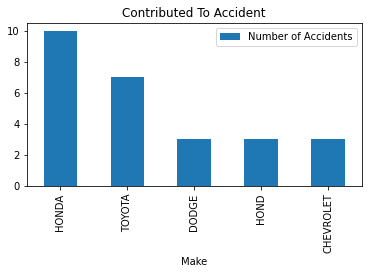

In [ ]:
from matplotlib import pyplot as plt

##Selecting Top 5 Number of accidents

high_df = df.head(5)
high_df

#convert list to dataframe
#df = pd.DataFrame(high_df)
high_df.columns = ['Make', 'Contributed To Accident', 'Number of Accidents']
high_df

high_df.plot.bar(title="Contributed To Accident",x='Make',y='Number of Accidents',figsize=(6,3));

